In [199]:
%config InlineBackend.figure_format = 'svg'

(13)=
# Chapter 13: Machine Learning using Scikit-Learn

```{index} machine learning
```

Machine learning is a hot topic with popular applications in driverless cars, internet search engines, and data analysis among many others. Numerous fields are utilizing machine learning, and chemistry is certainly no exception, with papers using machine learning methods being published regularly. There is a considerable amount of hype around the topic along with debate about whether the field will live up to this hype. However, there is little doubt that machine learning is making a significant impact and is a powerful tool when used properly.

*Machine learning* occurs when a program exhibits behavior that is not explicitly programmed but rather is “learned” from data. This definition may seem somewhat unsatisfying because it is so broad that it is vague and only mildly informative. Perhaps a better way of explaining machine learning is through an example. In [section 13.1](13.1), we are faced with the challenge of writing a program that can accurately predict the boiling point of simple alcohols when provided with information about the alcohols, such as the molecular weight, number of carbon atoms, degree, etc. These pieces of information about each alcohol are known as *features*, while the answer we aim to predict (i.e., boiling point) is the *target*. How can each feature be used to predict the target? To generate a program for predicting boiling points, we would need to pore over the data to see how each feature affects the boiling point. Next, we would need to write a script that somehow uses these trends to calculate the boiling points of alcohols we have never seen. This probably appears like a daunting task. Instead, we can use machine learning to solve this task by allowing the machine learning algorithms to figure out how to use the data and make predictions. Simply provide the machine learning algorithm with the features and targets on a number of alcohols and allow the machine learning algorithm to quantify the trends and develop a function to predict the boiling point of alcohols. In simple situations, this entire task can be completed in just a few minutes!
The sections in this chapter are broken down by types of machine learning. There are three major branches of machine learning: supervised, unsupervised, and reinforcement learning. This chapter will focus on the first two, which are the most applicable to chemistry and data science, while the latter relates more to robotics and is not as commonly employed in chemistry.

There are multiple machine learning libraries for Python, but one of the most common, general-purpose machine learning libraries is scikit-learn. This library is simple to use, offers a wide array of common machine learning algorithms, and is installed by default with Anaconda. As you advance in machine learning, you may find it necessary to branch out to other libraries, but you will probably find that scikit-learn does almost everything you need it to do during your first year or two of using machine learning. In addition, scikit-learn includes functions for preprocessing data and evaluating the effectiveness of models.

```{index} scikit-learn
```

The scikit-learn library is abbreviated `sklearn` during imports. Each module needs to be imported individually, so you will see them imported throughout this chapter. We will be working with data and visualizing our results, so we will also be utilizing pandas, NumPy, and matplotlib. This chapter assumes the following imports.

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

```{index} machine learning; supervised
```
(13.1)=
## 13.1 Supervised Learning

*Supervised learning* is where the machine learning algorithms are provided with both feature and target information with the goal of developing a model to predict targets based on the features. When the supervised machine learning predictions are looking to categorize an item like a photo or type of metal complex, it is known as *classification*; and when the predictions are seeking a numerical value from a continuous range, it is a *regression* problem. Some machine learning algorithms are designed for only classification or only regression while others can do either.

There are numerous algorithms for supervised learning; below are simple examples employing some well-known and common algorithms. For a more in-depth coverage of the different machine learning algorithms and scikit-learn, see the [Further Reading](fr13) section at the end of this chapter.

(13.1.1)=
### 13.1.1 Features and Information

The file titled *ROH_data.csv* contains information on over seventy simple alcohols (i.e., a single -OH with no additional non-hydrocarbon functional groups) including their boiling points. Our goal is to generate a function or algorithm to predict the boiling points of the alcohols based on the information on the alcohols, so here the target is the boiling point and features are the other information about the alcohols.

In [201]:
ROH = pd.read_csv('data/ROH_data.csv', sep=',')
ROH.head()

,bp,MW,carbons,degree,aliphatic,avg_aryl_position,cyclic
0,338,32.04,1,1,1,0.0,0
1,351,46.07,2,1,1,0.0,0
2,371,60.10,3,1,1,0.0,0
3,356,60.10,3,2,1,0.0,0
4,391,74.12,4,1,1,0.0,0


The dataset includes the boiling point (K), molecular weight (g/mol), number of carbon atoms, whether or not it is aliphatic, degree, whether it is cyclic, and the average position of any aryl substituents. Scikit-learn requires that all features be represented numerically, so for the last three features `1` represents `True` and `0` represents `False`.

Not every feature will be equally helpful in predicting the boiling points. Chemical intuition may lead someone to propose that the molecular weight will have a relatively large impact on the boiling points, and the scatter plot below supports this prediction with boiling points increasing with molecular weight. However, the molecular weight alone is not enough to obtain a good boiling point prediction as there is as much as a one-hundred-degree variation in boiling points at around the same molecular weight. The color of the markers indicates the degree of the alcohol, and it is pretty clear that tertiary alcohols tend to have lower boiling points than primary and secondary alcohols, which means there is a small amount of information in the degree that can be used to improve a boiling point prediction. If all the small amounts of information from each feature are combined, there is potential to produce a better boiling point prediction, and machine learning algorithms do exactly this.

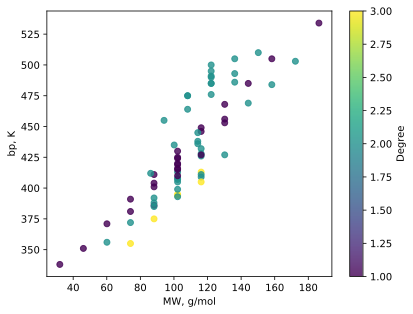

In [202]:
plt.scatter(ROH['MW'], ROH['bp'], alpha=0.8, c=ROH['degree'], cmap='viridis')
plt.xlabel('MW, g/mol')
plt.ylabel('bp, K')
cbar = plt.colorbar()
cbar.set_label('Degree')

(13.1.2)=
### 13.1.2 Train Test Split

Whenever training a machine learning model to make predictions, it is important to evaluate the accuracy of the predictions. It is unfair to test an algorithm on data it has already seen, so before training a model, first split the dataset into a training subset and a testing subset. It is also important to shuffle the dataset before splitting it as many datasets are at least partially ordered. The alcohol dataset is roughly in order of molecular weight, so if an algorithm is trained on the first three-quarters of the dataset and then tested on the last quarter, training occurs on smaller alcohols and testing on larger alcohols. This could result in poorer predictions as the machine learning algorithm is not familiar with the trends of larger alcohols. The good news is that scikit-learn provides a built-in function for shuffling and splitting the dataset known as `train_test_split()`. The arguments are the features, target, and the fraction of the dataset to be used for testing. Below, a quarter of the dataset is allotted for testing (`test_size=0.25`).

````{margin}
```{tip}
The `train_test_split()` function randomly shuffles the dataset before splitting it resulting in different results each time the function is called. The `random_state=` argument can be used to produce fixed results for example or demo purposes.
```
````

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
target = ROH['bp']
features = ROH[[ 'MW', 'carbons', 'degree', 'aliphatic', 
                'avg_aryl_position','cyclic']]

In [205]:
X_train, X_test, y_train, y_test =train_test_split(features, target, 
                                                   test_size=0.25, random_state=18)

The output includes four values containing the training/testing features and targets. By convention, `X` contains the features and `y` are the target values because they are the independent and dependent variables, respectively; and the features variable is capitalized because it contains multiple values per alcohol.

````{margin}
```{tip}
Another variable name convention is to capitalize variables that contain a collection and use lowercase letters for single values. For example, a single $x$-value in a plot would be `x` while a list containing multiple $x$-values would be `X`.
```
````

```{index} single: regression; machine learning
```
(13.1.3)=
### 13.1.3 Training a Linear Regression Model

Now for some machine learning using a very simple *linear regression* model. This model treats the target value as a linear combination or weighted sum of the features where $x$ are the features and $w$ are the weights.

$$ target = w_0x_0 + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 + ... $$

The general procedure for supervised machine learning, regardless of model, usually includes three steps.

1. Create a model and attach it to a variable.
2. Train the model with the training data.
3. Evaluate the model using the testing data or use it to make predictions.

To implement these steps, the linear model from the `linear_model` module is first created with the `LinearRegression()` function and assigned the variable `reg`. Next, it is trained using the `fit()` method and the training data from above.

In [206]:
from sklearn import linear_model

In [207]:
reg = linear_model.LinearRegression()

In [208]:
reg.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Finally, the trained model can make predictions using the `predict()` method.

In [209]:
prediction = reg.predict(X_test)
prediction

array([521.94389573, 439.60028899, 421.38488633, 485.6143471 ,
       355.07207513, 444.98911542, 439.60028899, 487.61879909,
       488.64633926, 497.31838329, 388.22848073, 406.39325504,
       424.6086577 , 444.98911542, 485.56371876, 439.60028899,
       503.77912142, 409.61702641])

Remember that the algorithm has only been provided the features for the testing subset; it has never seen the `y_test` target data. The performance can be assessed by plotting the predictions against the true values.

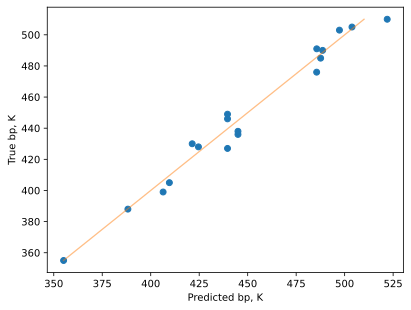

In [210]:
plt.plot(prediction, y_test, 'o')
plt.plot(y_test, y_test, '-', lw=1.3, alpha=0.5)
plt.xlabel('Predicted bp, K')
plt.ylabel('True bp, K');

This is a substantial improvement from using only the molecular weight to make predictions! If the above code is run again, the results will likely vary because the `train_test_split()` function randomly splits the dataset, so each time the above code is run, the algorithm is trained and tested on different portions of the original dataset.

(13.1.4)=
### 13.1.4 Model Evaluation

It is important to evaluate the effectiveness of trained machine learning models before rolling them out for widespread use, and scikit-learn provides multiple built-in functions to help in this task. The first is the `score()` method. Instead of making predictions using the testing features and then plotting the predictions against the known values, the `score()` method takes in the testing features and target values and returns the $r^2$. The closer the $r^2$ value is to 1, the better the predictions are.

In [211]:
reg.score(X_test, y_test)

0.9738116533899365

```{index} k-fold cross-validation
```

Another tool for evaluating the efficacy of a machine learning algorithm is *k-fold cross-validation*. The prediction results will vary depending on how the dataset is randomly split into training and testing data. *K*-fold cross-validation compensates for this randomness by splitting the entire dataset into *k* (i.e., counting number) chunks called *folds*. It then reserves one fold as the testing fold and trains the algorithm on the rest. The algorithm is tested using the testing fold, and the process is repeated with a different fold reserved for testing (Figure 1). Each iteration trains a fresh algorithm, so it does not remember anything from the previous train/test iteration. The results for each iteration are provided at the end of this process.

![](img/cross_validation_folds.svg)

**Figure 1** In each iteration of *k*-fold cross-validation, different folds of data are used for training and testing the algorithm.

A demonstration of *k*-fold cross-validation is shown below. First, a cross-validation generator is created using the `ShuffleSplit()` function. This function shuffles the data to avoid having all similar alcohols in any particular fold. The linear model is then provided to the `cross_val_score()` function along with the feature and target data and the cross-validation generator.

In [212]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

In [213]:
splitter = ShuffleSplit(n_splits=5)

In [214]:
reg = linear_model.LinearRegression()

In [215]:
scores = cross_val_score(reg, features, target, cv=splitter)
scores

array([0.97995739, 0.91099428, 0.96598441, 0.96818737, 0.98512967])

The scores are the $r^2$ values for each iteration. The average $r^2$ is a pretty reasonable assessment of the efficacy of the model and can be found through the `mean()` function.

In [216]:
scores.mean()

np.float64(0.9620506235580699)

(13.1.5)=
### 13.1.5 Linear Models and Coefficients

Recall that the linear model calculates the boiling point based on a weighted sum of the features, so it can be informative to know the weights to see which features are the most influential in making the predictions. The `LinearRegression()` method contains the attribute `coef_` which provides these coefficients in a NumPy array.

In [217]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg.coef_

array([ -5.06283477,  89.19634615, -14.99163129,   5.73273187,
        -2.05508033,  15.9368917 ])

These coefficients correspond to molecular weight, number of carbons, degree, whether or not it is aliphatic, average aryl position, and whether or not it is cyclic, respectively. While some coefficients are larger than others, we cannot yet distinguish which features are more important than the others because the values for each feature occur in different ranges. This is because the coefficients are not only proportional to the predictive value of a feature but also inversely proportional to the magnitude of feature values. For example, while the molecular mass has greater predictive value than the degree, the degree has a larger coefficient because it occurs in a smaller range (1 $\rightarrow$ 3) than the molecular weights (32.04 $\rightarrow$ 186.33 g/mol). You may also be wondering why molecular weight has a negative coefficient despite this feature leading to a higher boiling point. Because molecular weight and the number of carbons affect the boiling point by increasing the size of the molecule, they contribute similar information to the boiling point prediction. In this example, the machine learning model opted to use the number of carbons as we might have expected and the molecular weight very little compared to the number of carbons. As to why molecular weight is negative is potentially arbitrary and comes from the fact that as one of these two feature coefficients gets larger in the positive direction, the other tends to shift in the opposite direction to compensate.

To address the feature scale issue, the scikit-learn `sklearn.preprocess` module provides a selection of functions for scaling the features to the same range. Three common feature scaling functions are described in Table 1, but others are detailed on the scikit-learn website.

**Table 1** Preprocessing Data Scaling Functions

| Scaler | Description |
| :----: | :---------  |
|`MinMaxScaler` | Scales the features to a designated range; defaults to \[0, 1\] |
|`StandardScaler` | Centers the features around zero and scales them to a variance of one |
| `RobustScaler` | Centers the features around zero using the median and sets the range using the quartiles; similar to StandardScaler except less affected by outliers|

For this data, we will use the `MinMaxScaler()` with the default scaling of values from 0 $\rightarrow$ 1. This process parallels the fit/predict procedure above except that instead of predicting the target, the algorithm transforms it. That is, first the algorithm learns about the data using the `fit()` method followed by scaling the data using the `transform()` method. Once the scaling model is trained, it can be used to scale any new data by the same amount as the original data.

In [218]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)

With the features now scaled, we can proceed through training the linear regression model as we have done previously and examine the coefficients.

In [219]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target)

In [220]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [221]:
reg.coef_

array([-877.67363819, 1078.98111376,  -32.65751254,   12.91336785,
         -4.86457604,   14.66219749])

It is quite clear from the coefficients that the molecular weight and number of carbons are both by far the most important features to predicting the boiling points of alcohols. This makes chemical sense, since larger molecules have greater London dispersion forces, thus increasing the boiling points.

```{index} machine learning; classification
```
```{index} machine learning; random forest
```
(13.1.6)=
### 13.1.6 Classification using Random Forests

Classification involves sorting items into discrete categories such as sorting alcohols, aldehydes/ketones, and amines by type based on features. Scikit-learn provides a number of algorithms designed for this type of task. One method is known as a *decision tree* (Figure 2, left), which sorts items into categories based on a series of conditions. For example, it might first sort chemicals based on which have degrees of unsaturation greater than zero because these are most likely to be the aldehydes and ketones. It will then take the samples with zero degrees of unsaturation, which are the alcohols and amines, and separate them through another condition based on other information about the chemical compounds. Decision trees are relatively simple and easily interpreted, but they tend not to perform particularly well in practice. An extension of the decision tree is the *random forest* (Figure 2, right), which trains a larger number of decision trees using different subsets of the training data, resulting in large numbers of different decision trees. Each decision tree is used to predict the category, and the final prediction is based on the majority prediction of all the trees. Random forests tend to be more accurate than a single decision tree because even if every tree is only slightly better than random at making an accurate prediction, large numbers of decision trees have a much higher probability of making a correct prediction because of the law of large numbers.

![](img/tree_and_forest.svg)

**Figure 2** An illustration of a single decision tree (left) and a random forest (right) composed of numerous decision trees generated with different subsections of data.

(13.1.7)=
### 13.1.7 Classify Chemical Compounds

To demonstrate classification, we will use a small dataset containing 122 monofunctional organic compounds from three different categories: alcohols (category 0), ketones/aldehydes (category 1), and amines (category 2). The features provided are the molecular weight, number of carbons, boiling point, whether it is cyclic, whether it is aromatic, and the unsaturation number. All the data are represented numerically, so the data are ready to be used.

In [222]:
data = pd.read_csv('data/org_comp.csv')
data.head

<bound method NDFrame.head of      class   bp      MW  C  cyclic  aromatic  unsaturation
0        0  455   94.11  6       1         1             3
1        0  475  108.14  7       1         1             3
2        0  475  108.14  7       1         1             3
3        0  464  108.14  7       1         1             3
4        0  474  122.17  8       1         1             3
..     ...  ...     ... ..     ...       ...           ...
117      2  498  135.21  9       1         1             3
118      2  407   99.17  6       1         0             1
119      2  381   85.15  5       1         0             1
120      2  327  113.20  7       1         0             1
121      2  463  127.23  8       1         0             1

[122 rows x 7 columns]>

In [223]:
target = data['class']
features = data.drop('class', axis=1)

Now that we have our data, the classification process is similar to the regression example above: first perform a train/test split, initiate the model, train the model, and then test it.

In [224]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.25, random_state=18)

In [225]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=18)
rf.fit(X_train, y_train)
rf.predict(X_test)

array([0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       1, 2, 0, 1, 0, 2, 2, 0, 2])

We now have predictions for our testing data, but it would be helpful to know how accurate these predictions are. Again, there is the `score()` method that can calculate the fraction of accurately predicted functional groups.

In [226]:
rf.score(X_test, y_test)

0.7096774193548387

```{index} confusion matrix
```
(13.1.8)=
### 13.1.8 Confusion Matrix

The above score shows that the predictions are about 71% accurate. However, with three possible categories, this number does not tell the whole story because it does not inform us as to where the errors are occurring. For this, we will use a *confusion matrix* which is a grid of predicted categories versus true categories.

In [227]:
from sklearn.metrics import confusion_matrix

In [228]:
conf_matrix = confusion_matrix(y_test, rf.predict(X_test))
conf_matrix

array([[11,  0,  1],
       [ 2,  3,  0],
       [ 6,  0,  8]])

Each row is a true category and each column is the predicted category, but it is difficult to interpret the confusion matrix without labels. We can use seaborn’s `heatmap()` function (see [section 10.6](10.6)) to produce a clearer representation.

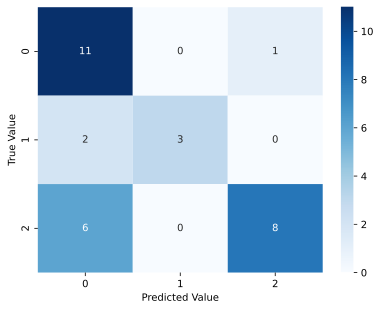

In [229]:
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value');

Every value in the diagonal has the same predicted category as the true value, making them correct predictions, whereas anything off diagonal is an incorrect prediction. For example, the bottom left corner shows that six instances were predicted as category 0 but really belong to category 2. Examination of the confusion matrix shows that the most common erroneous prediction is a category 0. This could be due to, for example, the fact that alcohols and amines both tend to have degrees of unsaturation of zero in this dataset.

```{index} machine learning; unsupervised
```
(13.2)=
## 13.2 Unsupervised Learning

Another major class of machine learning is *unsupervised learning* where no target value is provided to the machine learning algorithm. Unsupervised learning seeks to find patterns in the data instead of making predictions. One form of unsupervised problem is *dimensionality reduction* where the number of features is condensed down to typically two or three features while maintaining as much information as possible. Another unsupervised learning task is *clustering* where the algorithm attempts to group similar items in a dataset. Because no target label is available, the algorithm does not know what each group contains; it only knows that the data fall into a pattern of cohesive groups. *Blind signal separation (BSS)* is a third unsupervised task introduced below where the algorithm attempts to pull apart mixed signals into its components without knowledge of the components. One application of BSS is extracting the spectra of pure compounds from spectra containing a mixture of chemical compounds.


```{index} machine learning; dimensionality reduction
```
(13.2.1)=
### 13.2.1 Dimensional Reduction

We will first address dimensionality reduction, which typically condenses features down to two or three dimensions because it is often used in the visualization of high-dimensional data. To demonstrate this task, we will use scikit-learn’s `datasets` module, which contains datasets along with data-generating functions. We will use the wine classification dataset that includes 178 samples of three different types of wines, which we will classify based on features such as alcohol content, hue, malic acid, etc.

(13.2.2)=
### 13.2.2 Load Wine Dataset

To load the wine dataset, we first need to import the `load_wine()` function and then call the function.

In [230]:
from sklearn.datasets import load_wine
wine = load_wine()

The data are now stored as a dictionary-style object in the variable `wine`, with the features stored under the key `data` and targets stored under `target`.

In [231]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]], shape=(178, 13))

In [232]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

Notice again that every data point, including the category, is a number because scikit-learn requires that all data be numerically encoded. We can get a full listing of the keys using the `keys()` method shown below. Most keys are self-explanatory except for the `DESCR`, which provides a description of the dataset for those who are interested.

In [233]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

We will store the features and target values in variables for use in the next section.

In [234]:
features = wine.data
target = wine.target

(13.2.3)=
### 13.2.3 Reduce Dimensionality of Wine Dataset

Below is a list of thirteen features in the wine dataset, which is too many to represent in a single plot, so it needs to be pared down to two or three.

In [235]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

Inevitably, some information will be lost by representing high-dimensionality data in lower dimensions, but the algorithms in scikit-learn are designed to preserve as much information as possible. Among the most common algorithms is *principal component analysis (PCA)*, which determines the axes of greatest variation in the dataset known as principal components. The first principal component is the axis of greatest variation, the second principal component is the axis of the second greatest variation, and so on. Every subsequent principal component is also orthogonal to the previous principal components.

As a simplified example, below is a dataset containing only two features. The axis of greatest variation slopes down and to the right, shown with a longer solid line, making this the first principal component. The second principal component is the axis of second greatest variation perpendicular to the first axis shown as a dotted line. If the data had a third dimension, the third principal component would come directly out of the page orthogonal to the first two principal components. Each data point is then represented by its relationship to the principal component axes. That is, the principal components are the new Cartesian axes. This may seem trivial with only two features, but it allows high-dimensional data to be reasonably represented in only two or three dimensions while preserving as much information as possible.

![](img/pca_graphic.svg)

**Figure 2** Principal components are axes of greatest variation of a dataset in feature space. The first principal component (solid line) is the axis of greatest variation while the second principal component (dotted line) is the axis of second greatest variation orthogonal to the first.

The PCA algorithm is provided in the `decomposition` module of scikit-learn. Unsupervised learning procedures are similar to those of supervised learning except that there is no reason to split the data into training and testing sets, and instead of making predictions, the trained algorithm is used to transform the data. The general process is outlined below.

1. Create a model attached to a variable.
2. Train the model with the `fit()` method using all of the data.
3. Modify the data using the `transform()` method.

Principal component analysis is sensitive to the scale of features, so before we proceed, we will scale the features using the `StandardScaler()` function introduced in [section 13.1.5](13.1.5).

In [236]:
from sklearn.preprocessing import StandardScaler

In [237]:
SS = StandardScaler() 
features_ss = SS.fit_transform(features)

When training the PCA model, it can take a number of arguments. Most are beyond the scope of this chapter, but the one you should focus on is `n_components=` where the user provides the number of principal components desired. In this case, we will obtain two principal components because it is the easiest to visualize.

In [238]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
trans_data = pca.fit_transform(features_ss)
trans_data.shape

(178, 2)

The result is a two-dimensional array where each column represents a principal component. We can plot these components against each other and color the markers based on the class.

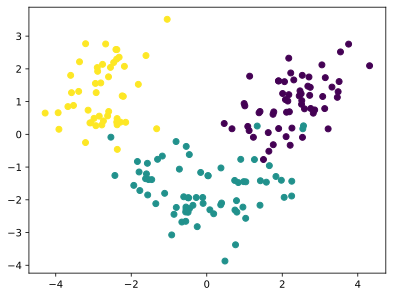

In [239]:
plt.scatter(trans_data[:,0], trans_data[:,1], c=target);

We can see that the three categories of wine all form cohesive clusters with class 0 and 2 being well resolved and class 1 exhibiting slight overlap with the other two classes of wine. This suggests that we should have better luck distinguishing between class 0 and 2 than between these two classes and class 1.

```{index} machine learning; k-means
```
```{index} machine learning; clustering
```
(13.2.4)=
### 13.2.4 Clustering

Clustering involves grouping similar items in a dataset, and this can be performed with a number of algorithms including *k*-means, agglomerative clustering, and Density Based Spatial Clustering Application with Noise (DBSCAN) among others. This process is somewhat similar to classification except that no labels are provided, so the algorithm does not know anything about the groups and must rely on the similarity of samples. Here we will use the DBSCAN clustering algorithm. This algorithm works by assigning items in a dataset as *core* data points if they are within a minimum distance (`eps`) of a minimum number of other samples in a dataset (`min_samples`). Clusters are built around these core data points, and any data point not within `eps` distance from a core data point is designated as *noise*, which means it is not assigned to any cluster. The larger the minimum distance and smaller minimum number of samples, the fewer clusters that are likely to be predicted by DBSCAN. One notable attribute of this algorithm versus some of the others mentioned above is that DBSCAN does not require the user to provide a requested number of clusters; it determines the number of clusters based on the other parameters mentioned above.

To demonstrate clustering, we will generate a random, synthetic dataset using the `make_blob()` function from the `sklearn.datasets` module. This function takes a number of arguments, including the number of samples (`n_samples`), number of features (`n_features`), number of clusters (`centers`), and the standard deviation of the clusters (`cluster_std`). We will only generate two features to make this example easy to visualize. The output of `make_blobs()` is a NumPy array containing the features (`X`) and a second NumPy array containing the labels (`y`).

In [240]:
from sklearn.datasets import make_blobs

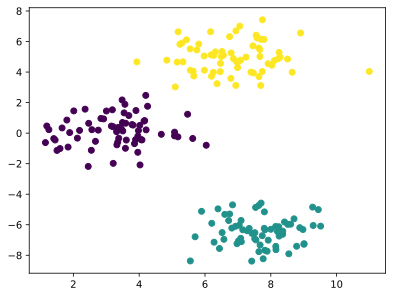

In [241]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=1, random_state=18)
plt.scatter(X[:,0], X[:,1], c=y);

We can see three distinct clusters, with the cluster on the bottom being more distinct than the two at the top. Also, notice that the scales of the two features are different by roughly a factor of two. Before we can use this data, we will need to normalize the scale of both features as clustering algorithms are sensitive to scale. For this task, we will use the `StandardScaler()` function introduced in [section 13.2.5](13.2.5).

In [242]:
SS = StandardScaler()
X_ss = SS.fit_transform(X)

Now that the data are scaled, we will initiate our model, train it using the `fit()` method, and examine the predictions using the `labels_` attribute.

In [243]:
from sklearn.cluster import DBSCAN
DB = DBSCAN(eps=0.4, min_samples=5)
DB.fit(X_ss)

,"eps eps: float, default=0.5The maximum distance between two samples for one to be consideredas in the neighborhood of the other. This is not a maximum boundon the distances of points within a cluster. This is the mostimportant DBSCAN parameter to choose appropriately for your data setand distance function. Smaller values generally lead to more clusters.",0.4
,"min_samples min_samples: int, default=5The number of samples (or total weight) in a neighborhood for a point tobe considered as a core point. This includes the point itself. If`min_samples` is set to a higher value, DBSCAN will find denser clusters,whereas if it is set to a lower value, the found clusters will be moresparse.",5
,"metric metric: str, or callable, default='euclidean'The metric to use when calculating distance between instances in afeature array. If metric is a string or callable, it must be one ofthe options allowed by :func:`sklearn.metrics.pairwise_distances` forits metric parameter.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors for DBSCAN... versionadded:: 0.17 metric *precomputed* to accept precomputed sparse matrix.",'euclidean'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function... versionadded:: 0.19",None
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'The algorithm to be used by the NearestNeighbors moduleto compute pointwise distances and find nearest neighbors.'auto' will attempt to decide the most appropriate algorithmbased on the values passed to :meth:`fit` method.See :class:`~sklearn.neighbors.NearestNeighbors` documentation fordetails.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or cKDTree. This can affect the speedof the construction and query, as well as the memory requiredto store the tree. The optimal value dependson the nature of the problem.",30
,"p p: float, default=NoneThe power of the Minkowski metric to be used to calculate distancebetween points. If None, then ``p=2`` (equivalent to the Euclideandistance). When p=1, this is equivalent to Manhattan distance.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


In [244]:
DB.labels_

array([ 0,  0,  1,  1,  2,  0,  2,  1,  0,  0,  0,  0,  2,  2,  2,  2,  1,
        0,  2,  0,  2,  0,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  1,  1,
        2,  2,  1,  0,  0,  0,  1,  0,  0,  1,  1,  2,  0,  2, -1,  1,  0,
        1,  1,  1,  0,  0,  1,  2,  1,  2,  0,  2,  2,  0,  1,  0,  2,  2,
        2,  0,  2,  1,  1,  0,  2,  1,  0,  2,  0,  1,  0,  2,  0,  2,  0,
        2,  0,  2,  1,  1,  2,  1,  0,  1,  0,  0,  1,  1,  2,  0,  2,  1,
        2,  2,  1,  2,  0,  1,  2,  2,  0,  2,  2,  2,  1,  1,  0,  0,  1,
        0,  2,  2,  1,  1,  1,  2,  2,  1,  0,  0,  1,  1,  2,  2,  0,  2,
        0,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  2,  2,  2,  1,  1,
        2,  2,  1,  0,  1,  1,  2,  2,  2,  1,  2,  0,  0,  0,  2, -1,  2,
        2,  2,  1,  2,  0,  0,  2,  1,  0,  1,  1,  2,  0,  2,  1,  1,  2,
        2,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  2,  2])

The DBSCAN algorithm has designated which cluster each data point belongs to by assigning them an integer label. Notice in the plot below that the labels assigned to each cluster are not the same as those in the previous plot. Clustering labels are not classes but rather are merely to indicate which data points belong to the same cluster. The values themselves do not matter. Two data points have been assigned values of `-1`, which means these data points are noise. The *k*-means and agglomerative clustering algorithms would have assigned all data points, including outliers, to a cluster; but DBSCAN is willing to label outliers as noise.

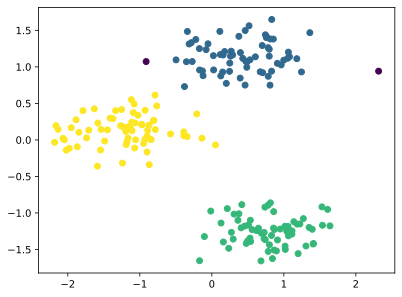

In [245]:
plt.scatter(X_ss[:,0], X_ss[:,1], c=DB.labels_);

```{index} machine learning; blind signal (or source) seperation
```
(13.2.5)=
### 13.2.5 Blind Signal Separation

Blind signal (or source) separation (BSS) is the process of separating independent component signals from a mixed signal. One application is in chemical spectroscopy where a spectrum may include signals from multiple chemical compounds in a mixture. If we provide the BSS algorithm multiple spectra of chemical mixtures where each mixture contains varying amounts of each chemical, the BSS algorithm should be able to separate the signals for each chemical component.

To demonstrate this process, we will use infrared (IR) spectroscopy data containing mixtures of acetone, cyclohexane, toluene, and methanol in random ratios. Below are plots of four mixtures. We can see that, for example, the bands at ~3400 cm$^{-1}$ and ~1000 cm$^{-1}$ increase together, suggesting that they originate from the same compound; this type of information can be used to discriminate which band belongs to which compound. However, instead of doing this manually, we can allow the machine learning algorithms to pick apart the spectra, and even better yet, yield complete spectra of each component.

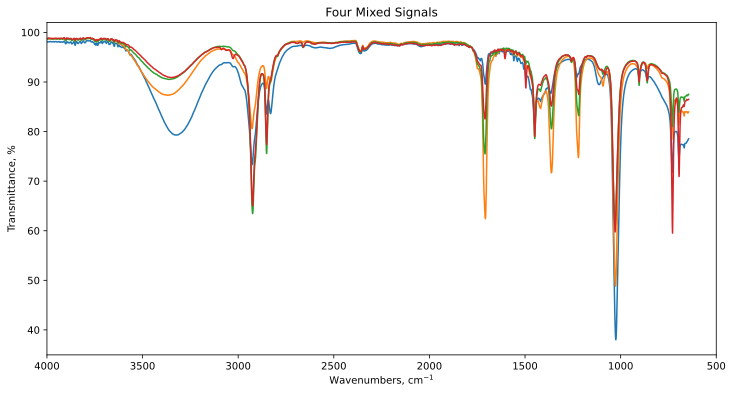

In [246]:
import os

path = os.path.join(os.getcwd(), 'data')
os.chdir(path)

data_mix = []

clip = 300

for file in os.listdir():
    if file.lower().endswith('csv') and file.lower().startswith('mix'):
        data_mix.append(np.genfromtxt(file, delimiter=',')[clip:,1])
        wavenumbers = np.genfromtxt(file, delimiter=',')[clip:,0]        

data_array_mix = np.vstack(data_mix).T

os.chdir(os.path.dirname(os.getcwd()))

S = np.ndarray.astype(data_array_mix, float) #recast strings as floats

fig0 = plt.figure(figsize=(12,6))
ax0 = fig0.add_subplot(1,1,1)
wn = np.array(wavenumbers).T
ax0.plot(wn, S[:,0], wn, S[:,1], wn, S[:,2], wn, S[:,3])

plt.gca().invert_xaxis()
plt.title('Four Mixed Signals')
plt.xlabel('Wavenumbers, cm$^{-1}$')
plt.ylabel('Transmittance, %')
plt.xlim(4000,500)
plt.show()

For this task, we will use the *independent component analysis (ICA)* function called `fastICA()` available in scikit-learn. The process parallels the other unsupervised learning processes above of first training the algorithm using the `fit()` method followed by transforming the data using the `transform()` method. First we will load the data from the files and stack them into an array called `S_mix` where each column contains the data from a spectrum. For comparison purposes, we will also load IR spectra of each pure component into an array called `S_pure`. Normally we would not have spectra of pure components, hence the "blind" in blind signal separation, but this is just an example.

The code below also grabs a copy of the wavenumbers (`wn`) for plotting purposes later on. The last 300 data points of the spectra in this example are also being clipped off because they are a low signal high noise region of the spectra which reduces the effectiveness of the separation.

In [247]:
import os
data_pure = []
data_mix = []

clip = 300 # clip off noisy far end of spectrum

path = os.path.join(os.getcwd(), 'data')
os.chdir(path)

for file in os.listdir():
    if file.lower().endswith('pure.csv'):
        data_pure.append(np.genfromtxt(file, delimiter=',')[clip:,1])
        wn = np.genfromtxt(file, delimiter=',')[clip:,0]        

    elif file.lower().endswith('csv') and file.lower().startswith('mix'):
        data_mix.append(np.genfromtxt(file, delimiter=',')[clip:,1])

        
data_array_pure = np.vstack(data_pure).T
data_array_mix = np.vstack(data_mix).T

S_pure = np.ndarray.astype(data_array_pure, float) #recast strings as floats
S_mix = np.ndarray.astype(data_array_mix, float) #recast strings as floats

In [248]:
os.chdir(os.path.dirname(os.getcwd()))

The next step is to train and transform the data. When generating the fastICA model, it requires the number of components (`n_components`), which is four in this case. One minor drawback of this algorithm is that the user must first know the number of components in the mixed signal.

````{margin}
```{note}
The below example sets the `random_state=42`. This is set to keep the outputs of this Jupyter Book consistent over time but is not necessary for regular use of the `FastICA()` function.
```
````

In [249]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=4, random_state=42)
S_fit = ica.fit_transform(S_mix)

In [250]:
S_fit.shape

(6961, 4)

You may have noticed that instead of doing the `fit()` and `transform()` in two steps, we used a `fit_transform()` method. This method is present in many unsupervised algorithms, allowing the user to perform both steps in a single function call. The resulting array `S_fit` contains the four extracted components, where each column of the array is a component. We can plot each component next to IR spectra of pure compounds collected separately to see how it performed. Remember that the BSS algorithm does not know anything about what these components are, so interpreting them or matching them to real chemical compounds is left to the user.

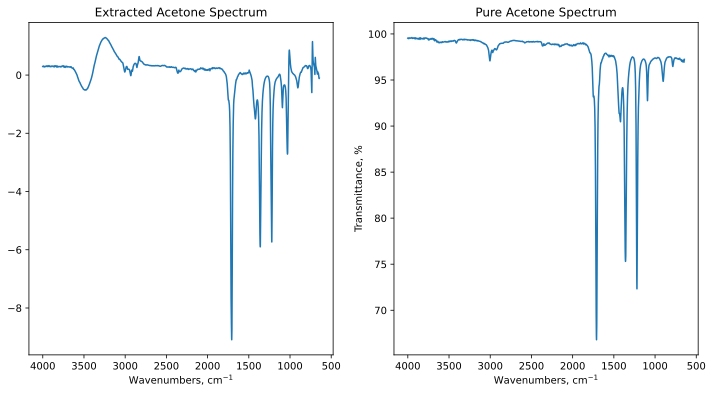

In [251]:
fig1 = plt.figure(figsize=(12,6))
ax1 = fig1.add_subplot(1,2,1)
ax1.plot(wn, S_fit[:,2])
plt.xlabel('Wavenumbers, cm$^{-1}$')
plt.title('Extracted Acetone Spectrum')
plt.gca().invert_xaxis()

ax2 = fig1.add_subplot(1,2,2)
ax2.plot(wn, S_pure[:,2])
plt.xlabel('Wavenumbers, cm$^{-1}$')
plt.ylabel('Transmittance, %')
plt.title('Pure Acetone Spectrum')
plt.gca().invert_xaxis()

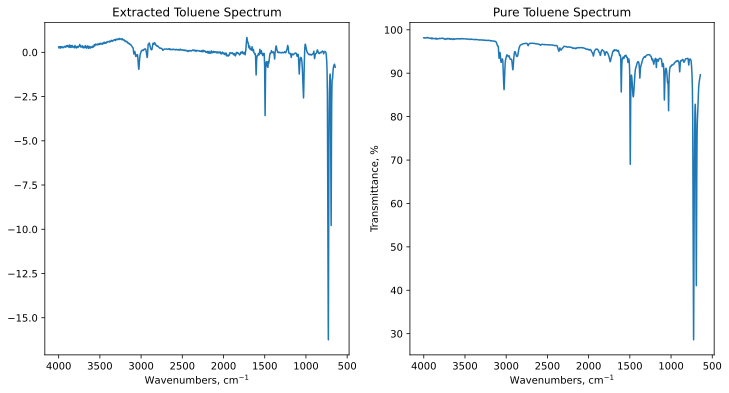

In [252]:
fig2 = plt.figure(figsize=(12,6))
ax1 = fig2.add_subplot(1,2,1)
ax1.plot(wn, S_fit[:,0])
plt.xlabel('Wavenumbers, cm$^{-1}$')
plt.title('Extracted Toluene Spectrum')
plt.gca().invert_xaxis()

ax2 = fig2.add_subplot(1,2,2)
ax2.plot(wn, S_pure[:,1])
plt.xlabel('Wavenumbers, cm$^{-1}$')
plt.ylabel('Transmittance, %')
plt.title('Pure Toluene Spectrum')
plt.gca().invert_xaxis()

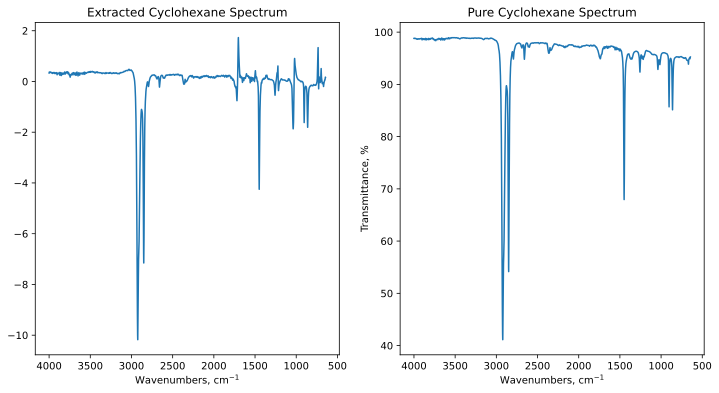

In [253]:
fig3 = plt.figure(figsize=(12,6))
ax1 = fig3.add_subplot(1,2,1)
ax1.plot(wn, S_fit[:,1])
plt.xlabel('Wavenumbers, cm$^{-1}$')
plt.title('Extracted Cyclohexane Spectrum')
plt.gca().invert_xaxis()

ax2 = fig3.add_subplot(1,2,2)
ax2.plot(wn, S_pure[:,0])
plt.xlabel('Wavenumbers, cm$^{-1}$')
plt.ylabel('Transmittance, %')
plt.title('Pure Cyclohexane Spectrum')
plt.gca().invert_xaxis()

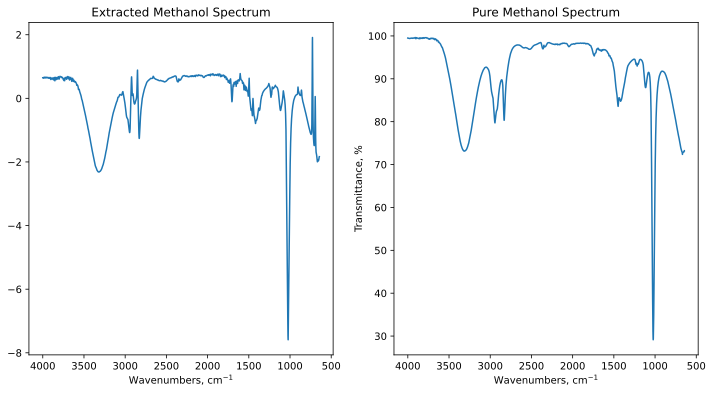

In [254]:
fig4 = plt.figure(figsize=(12,6))
ax1 = fig4.add_subplot(1,2,1)
ax1.plot(wn, S_fit[:,3])
plt.xlabel('Wavenumbers, cm$^{-1}$')
plt.title('Extracted Methanol Spectrum')
plt.gca().invert_xaxis()

ax2 = fig4.add_subplot(1,2,2)
ax2.plot(wn, S_pure[:,3])
plt.xlabel('Wavenumbers, cm$^{-1}$')
plt.ylabel('Transmittance, %')
plt.title('Pure Methanol Spectrum')
plt.gca().invert_xaxis()

Overall, the fastICA algorithm did a decent job - sometimes even an impressive job of picking out small features, but there are some discrepancies between the extracted and pure IR spectra. The first is that there are peaks that extend above the extracted spectra. A transmittance over 100% is not possible, but the algorithm does not know this. The *y*-axis scales of the extracted IR spectra also do not match the percent transmittance. While it is not shown here, sometimes the extracted components are also upside down. This is because the mixtures are assumed to be weighted sums of the components, and a component can be negative. If this bothers you, there is a related BSS algorithm called *non-negative matrix factorization (NMF)* supported in scikit-learn which requires each component to be non-negative. Finally, you may notice that there is a broad feature at around 3400 cm$^{-1}$ in the acetone, extracted component that is not in the pure compound. This is an O-H stretch from the methanol IR spectrum showing up in the acetone spectrum. This may be the result of hydrogen-bonding between methanol and acetone shifting the O-H bond, breaking down the assumption that the spectra of mixtures are purely additive.

(13.3)=
## 13.3 Final Notes

There is a saying that there is no task so simple it cannot be done wrong, and machine learning is no exception. Machine learning, like any tool, can be used incorrectly, leading to erroneous or error-prone results. One particular source of error in machine learning is making predictions outside the scope of the training dataset. That is, if we train an algorithm to predict the boiling points using aliphatic alcohols, there is no reason to expect that the algorithm should be able to accurately predict the boiling points of aromatic alcohols. Another risk in machine learning is overtraining an algorithm. Some algorithms provide numerous parameters which customize the behavior, and these parameters are often used to optimize the accuracy of the predictions. The parameters can be over-optimized for the training data so that the algorithm then performs worse in predictions for non-training data. This is known as *overtraining* the algorithm. In all of the excitement about how powerful and useful machine learning is, we should always keep the sources of error in mind and always remember that just because a machine learning algorithm makes a prediction does not make it true.

(fr13)=

## Further Reading

1. Scikit-Learn Website. [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)
   >This is a great resource both on using scikit-learn and about machine learning algorithms implemented within (free resource)

3. VanderPlas, J. Python Data Science Handbook: Essential Tools for Working with Data, 1st ed.; O’Reilly: Sebastopol, CA, 2017, chapter 5. Freely available from the author at [https://jakevdp.github.io/PythonDataScienceHandbook/](https://jakevdp.github.io/PythonDataScienceHandbook/) (free resource)

4. Müller, A. C.; Guido, S. *Introduction to Machine Learning with Python: A Guide for Data Scientists*, O'Reilly: Sebastopol, CA, 2016. -
   >This book is a general introduction to machine learning using scikit-learn and discusses many of the algorithms.

5. Géron, A. Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems, 1st ed.; O'Reilly: Sebastopol, CA, 2017.
   >This book provides a deeper discussion into the algorithms behind machine learning and provides an introduction into both scikit-learn and TensorFlow. A newer addition is also available that also provides an introduction to the Keras machine learning library. The math is relatively approachable for someone without a strong math background, and the math can be glossed over if need be.

7. Nallon,E. C.; Schnee, V. P.; Bright, C.; Polcha, M. P.; Li, Q. Chemical Discrimination with an Unmodified Graphene Chemical Sensor. *ACS Sens.* **2016,** 1, 26−31.
   >This is a relatively approachable article that applies scikit-learn to a chemical problem using both supervised and unsupervised techniques. [https://doi.org/10.1021/acssensors.5b00029](https://doi.org/10.1021/acssensors.5b00029)

9. Chen, J.; Wang, X. Z. A New Approach to Near-Infrared Spectral Data Analysis Using Independent Component Analysis. *J. Chem. Inf. Comput. Sci.* **2001,** 41, 992-1001.
    >This article provides extra background on how [principal component analysis (PCA)](13.2.3) and [independent component analysis (ICA)](13.2.5) work, among other topics, and applies ICA to analyzing chemical mixtures using near-infrared spectroscopy. [https://doi.org/10.1021/ci0004053](https://doi.org/10.1021/ci0004053)

## Exercises

Complete the following exercises in a Jupyter notebook and scikit-learn library. Any data file(s) referred to in the problems can be found in the [data](https://github.com/weisscharlesj/SciCompforChemists/tree/master/notebooks) folder in the same directory as this chapter's Jupyter notebook. Alternatively, you can download a zip file of the data for this chapter from [here](https://github.com/weisscharlesj/data_SciCompforChem) by selecting the appropriate chapter file and then clicking the **Download** button.

1. Import the data file **ROH_data.csv** containing data on simple alcohols and train a random forest algorithm to predict whether or not an alcohol is aliphatic. Remember to split the dataset using `train_test_split()` and evaluate the quality of the predictions.
    
2. Open the file titled **NMR_mixed_problem.csv** which contains three $^1$H NMR spectra. Each spectrum (columns) is a mixture of three chemical compounds in different ratios (artificially generated). Use fastICA to separate out three pure $^1$H NMR spectra of each component. Compare your separated spectra to the pure NMR spectra in **NMR_pure_problem.csv**.

3. Import the file titled **clusters.csv** containing unlabeled data with two features.

    a) Use the DBSCAN algorithm to predict clusters for each datapoint in the set. Plot
    the data points using color to represent each cluster.

    b) Use the *k*-means algorithm (`sklearn.cluster.KMeans`) to predict clusters for each datapoint in the set. This may require you to visit the Scikit-Learn website to view the documentation for this algorithm and function. Plot the data points using color to represent each cluster. You will need to provide this algorithm the number of clusters you feel is most appropriate.

4. Load the handwritten digits dataset using the `sklearn.datasets.load_digits()` function.

    a) Reduce the dimensionality of the dataset to two principal components and visualize it. Color the markers based on the category, and use `plt.cm.get_cmap('turbo',10)` to generate a colormap with ten colors. You will need to import `PCA` from `sklearn.decomposition`.

    b) Train the Gaussian Naive Bayes algorithm to classify the digits. Be sure to evaluate the effectiveness using a testing dataset. Import `GaussianNB` from `sklearn.naive_bayes`.